# TASK 1 : Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# TASK 2 : Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 33.33 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#set the path to the main dir
import os
main_dir="/content/datasets/Data"
#set the path to the train dir
train_dir=os.path.join(main_dir,'train')
#set the path to the test dir
test_dir=os.path.join(main_dir,'test')

#directory with the training covid images
train_covid_dir=os.path.join(train_dir,'COVID19')
#directory with the training normal images
train_normal_dir=os.path.join(train_dir,'NORMAL')
#directory with the testing covid images
test_covid_dir=os.path.join(test_dir,'COVID19')
#directory with the testing normal images
test_normal_dir=os.path.join(test_dir,'NORMAL')

In [ ]:
#print the filenames
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[:10])
train_normal_names=os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[:10])
test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[:10])


['COVID19(270).jpg', 'COVID19(511).jpg', 'COVID19(284).jpg', 'COVID19(481).jpg', 'COVID19(504).jpg', 'COVID19(119).jpg', 'COVID-19 (8).jpeg', 'COVID19(378).jpg', 'COVID-19 (180).jpg', 'COVID-19 (159).jpg']
['NORMAL(304).jpg', 'NORMAL(997).jpg', 'NORMAL(295).jpg', 'NORMAL(773).jpg', 'NORMAL(1575).jpg', 'NORMAL(374).jpg', 'NORMAL(776).jpg', 'NORMAL(919).jpg', 'NORMAL(21).jpg', 'NORMAL(979).jpg']
['COVID-19 (745).jpg', 'COVID19(160).jpg', 'COVID19(220).jpg', 'COVID-19 (789).jpg', 'COVID19(350).jpg', 'COVID-19 (839).jpg', 'COVID19(337).jpg', 'COVID19(346).jpg', 'COVID19(276).jpg', 'COVID19(34).jpg']
['NORMAL(127).jpg', 'NORMAL(275).jpg', 'NORMAL(1245).jpg', 'NORMAL(1184).jpg', 'NORMAL(825).jpg', 'NORMAL(725).jpg', 'NORMAL(1416).jpg', 'NORMAL(156).jpg', 'NORMAL(329).jpg', 'NORMAL(181).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total no.of Images present in the training set:",len(train_covid_names+train_normal_names))

print("Total no.of Images present in the test set:",len(test_covid_names+test_normal_names))

Total no.of Images present in the training set: 1811
Total no.of Images present in the test set: 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(270).jpg', '/content/datasets/Data/train/COVID19/COVID19(511).jpg', '/content/datasets/Data/train/COVID19/COVID19(284).jpg', '/content/datasets/Data/train/COVID19/COVID19(481).jpg', '/content/datasets/Data/train/COVID19/COVID19(504).jpg', '/content/datasets/Data/train/COVID19/COVID19(119).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (8).jpeg', '/content/datasets/Data/train/COVID19/COVID19(378).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(304).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(997).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(295).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(773).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1575).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(374).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(776).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(919).jpg']


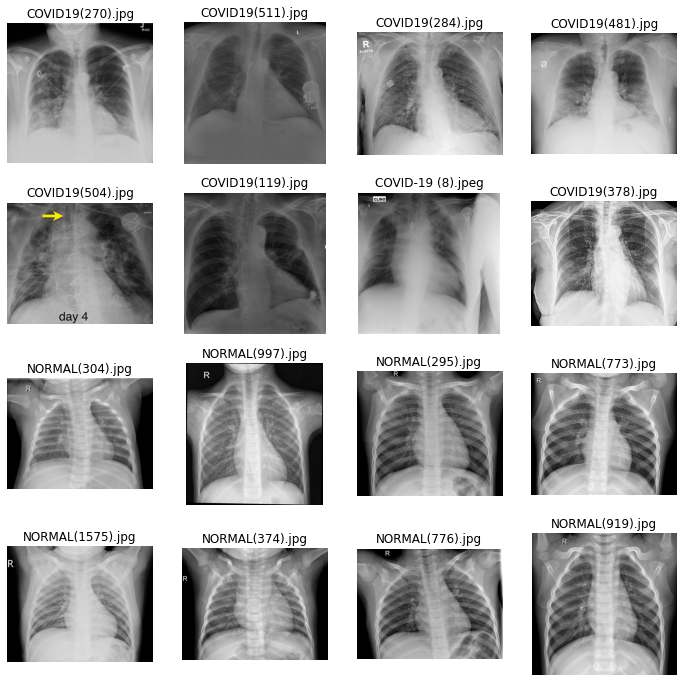

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows=4
cols=4
#set the figure size
fig=plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic=[os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic=[os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
for i,img_path in enumerate(covid_pic+normal_pic) :
  data=img_path.split('/',6)[6]
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=12)
  plt.imshow(img,cmap='gray')
plt.show()





# TASK 4 : Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches 
dgen_train=ImageDataGenerator(rescale=1./255,validation_split=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)
dgen_validation=ImageDataGenerator(rescale=1./255)
dgen_test=ImageDataGenerator(rescale=1./255)

train_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='training',
                                               batch_size=32,
                                               class_mode='binary')

validation_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='validation',
                                               batch_size=32,
                                               class_mode='binary')

test_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 1811 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model=Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
history=model.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 148s 3s/step - loss: 0.6935 - accuracy: 0.8185 - val_loss: 0.3949 - val_accuracy: 0.9227
Epoch 2/30
46/46 [==============================] - 145s 3s/step - loss: 0.2115 - accuracy: 0.9193 - val_loss: 0.2152 - val_accuracy: 0.9337
Epoch 3/30
46/46 [==============================] - 145s 3s/step - loss: 0.1654 - accuracy: 0.9386 - val_loss: 0.1341 - val_accuracy: 0.9669
Epoch 4/30
46/46 [==============================] - 145s 3s/step - loss: 0.1623 - accuracy: 0.9469 - val_loss: 0.2060 - val_accuracy: 0.9309
Epoch 5/30
46/46 [==============================] - 145s 3s/step - loss: 0.1432 - accuracy: 0.9476 - val_loss: 0.2578 - val_accuracy: 0.9475
Epoch 6/30
46/46 [==============================] - 145s 3s/step - loss: 0.1542 - accuracy: 0.9462 - val_loss: 0.1452 - val_accuracy: 0.9586
Epoch 7/30
46/46 [==============================] - 145s 3s/step - loss: 0.1247 - accuracy: 0.9614 - val_loss: 0.1012 - val_accuracy: 0.9586
Epoch 8/30
46

# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

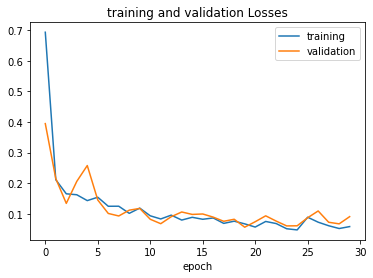

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('training and validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

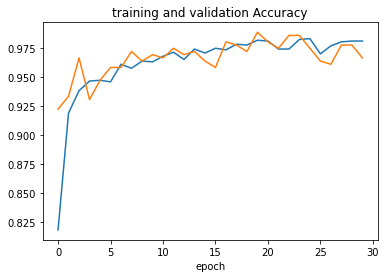

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training and validation Accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss,test_acc=model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

57/57 [==============================] - 79s 1s/step - loss: 0.0494 - accuracy: 0.9879
test loss:0.04939914867281914 test acc:0.9878520369529724


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for filename in uploaded.keys() :
  img_path='/content/'+filename
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(filename)
  if prediction==0 :
    print('COVID detected')
  else :
    print('Your Report is Normal')

Saving test-1.jpg to test-1 (4).jpg
Saving test-2.jpg to test-2.jpg
test-1.jpg
COVID detected
test-2.jpg
Your Report is Normal
